<a href="https://colab.research.google.com/github/HChandeepa/Reddit-posts-on-the-Israel-Palestine-War-War/blob/main/Reddit_Israel_and__Gaza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Israel_Gaza_War_Reddit_Data_Optimized_with_Comments1 - Copy.csv')

In [6]:
df.head()

,Post_Title,Comment_Text,Comment_Upvotes,Comment_Created_Date
0,Israel resumes water supply to southern Gaza a...,As per CNN\n\nIsraeli Prime Minister Benjamin ...,4628.0,10/15/2023 17:52
1,Israel resumes water supply to southern Gaza a...,What’s the long game here?(3ish weeks) does Is...,703.0,10/15/2023 16:54
2,Israel resumes water supply to southern Gaza a...,Good job to U.S. diplomats for changing Isreal...,5684.0,10/15/2023 16:24
3,Israel resumes water supply to southern Gaza a...,The US is in a crucial position to advance the...,1805.0,10/15/2023 16:44
4,Israel resumes water supply to southern Gaza a...,Everybody hates the United States until it’s t...,230.0,10/15/2023 20:14


In [7]:
df.shape

(15191, 4)

In [8]:
df.isna().sum().sum()

1424

In [9]:
df = df.dropna()

In [10]:
df.isna().sum().sum()

0

## Task 2: Text Preprocessing and Tokenization


In [11]:
import spacy
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.util import ngrams

In [12]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess_with_spacy(text):
    if isinstance(text, str):  # Check if the input is a string
        doc = nlp(text)  # Process text with SpaCy
        tokens = [
            token.lemma_  # Lemmatize each word
            for token in doc
            if not token.is_stop and token.is_alpha  # Remove stopwords and special characters
        ]
        return tokens  # Return tokens as a list
    return []  # Return an empty list for missing or invalid input

In [13]:
# Apply preprocessing and tokenization
df['Tokenized_Text'] = df['Comment_Text'].apply(preprocess_with_spacy)

In [14]:
print(df[['Comment_Text', 'Tokenized_Text']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...  
1  [long, game, week, Israel, obliterate, norther...  
2        [good, job, diplomat, change, Isreal, mind]  
3  [crucial, position, advance, humanitarian, cor...  
4  [everybody, hate, United, States, time, United...  


In [15]:
print("Missing values in Preprocessed_Comment_Text:", df['Tokenized_Text'].isnull().sum())

Missing values in Preprocessed_Comment_Text: 0


In [16]:
print(df['Tokenized_Text'].dropna().head())

0    [CNN, israeli, Prime, Minister, Benjamin, Neta...
1    [long, game, week, Israel, obliterate, norther...
2          [good, job, diplomat, change, Isreal, mind]
3    [crucial, position, advance, humanitarian, cor...
4    [everybody, hate, United, States, time, United...
Name: Tokenized_Text, dtype: object


In [17]:
for i in range(5):  # Adjust range for more samples
    original = df['Comment_Text'].iloc[i]
    processed = df['Tokenized_Text'].iloc[i]
    print(f"Original: {original}")
    print(f"Processed: {processed}")
    print("-----------")

Original: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Processed: ['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 

In [18]:
# Intialize Stemmer
Stemmer = PorterStemmer()

In [19]:
def stem_with_nltk(tokens):
    if isinstance(tokens, list):  # Ensure the input is a list
        return [Stemmer.stem(token) for token in tokens]
    return []  # Return an empty list for invalid input


In [20]:
df['Stemmed_Text'] = df['Tokenized_Text'].apply(stem_with_nltk)

In [21]:
print(df[['Comment_Text', 'Tokenized_Text', 'Stemmed_Text']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                        Stemmed_Text  
0  [cnn, isra, prime, minist, benjamin, netanyahu...  
1  [long, game, week, israel, obliter, northern, ...  
2         [good, job, diplomat, chang, isreal, mind]  
3  [crucial, posit, advanc, humanitarian, corrido...  
4  [everybodi, hate, unit, state, time, unit, sta..

In [22]:
# Generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['Bigrams'] = df['Stemmed_Text'].apply(lambda tokens: generate_ngrams(tokens, 2))
df['Trigrams'] = df['Stemmed_Text'].apply(lambda tokens: generate_ngrams(tokens, 3))

In [23]:
# Display the original tokens and n-grams for verification
for i in range(5):  # Adjust the range to inspect more rows
    print(f"Row {i + 1}:")
    print(f"Original Tokens: {df['Stemmed_Text'].iloc[i]}")
    print(f"Bigrams: {df['Bigrams'].iloc[i]}")
    print(f"Trigrams: {df['Trigrams'].iloc[i]}")
    print("-" * 50)


Row 1:
Original Tokens: ['cnn', 'isra', 'prime', 'minist', 'benjamin', 'netanyahu', 'offic', 'tell', 'cnn', 'sunday', 'israel', 'restor', 'water', 'southern', 'gaza', 'director', 'palestinian', 'water', 'author', 'say', 'sure', 'true', 'electr', 'restor', 'confirm', 'moment', 'water', 'station', 'khan', 'youni', 'gaza', 'citi', 'central', 'gaza', 'condit', 'receiv', 'distribut', 'water', 'peopl', 'munther', 'shublaq', 'director', 'water', 'author', 'gaza', 'tell', 'cnn', 'enabl', 'station', 'receiv', 'distribut', 'water', 'need', 'electr', 'current', 'cut', 'altern', 'fuel', 'power', 'gener', 'pressur', 'restor', 'water', 'suppli', 'confirm', 'station', 'readi']
Bigrams: [('cnn', 'isra'), ('isra', 'prime'), ('prime', 'minist'), ('minist', 'benjamin'), ('benjamin', 'netanyahu'), ('netanyahu', 'offic'), ('offic', 'tell'), ('tell', 'cnn'), ('cnn', 'sunday'), ('sunday', 'israel'), ('israel', 'restor'), ('restor', 'water'), ('water', 'southern'), ('southern', 'gaza'), ('gaza', 'director'), 

In [24]:
print(df[['Stemmed_Text', 'Bigrams', 'Trigrams']].head())

                                        Stemmed_Text  \
0  [cnn, isra, prime, minist, benjamin, netanyahu...   
1  [long, game, week, israel, obliter, northern, ...   
2         [good, job, diplomat, chang, isreal, mind]   
3  [crucial, posit, advanc, humanitarian, corrido...   
4  [everybodi, hate, unit, state, time, unit, sta...   

                                             Bigrams  \
0  [(cnn, isra), (isra, prime), (prime, minist), ...   
1  [(long, game), (game, week), (week, israel), (...   
2  [(good, job), (job, diplomat), (diplomat, chan...   
3  [(crucial, posit), (posit, advanc), (advanc, h...   
4  [(everybodi, hate), (hate, unit), (unit, state...   

                                            Trigrams  
0  [(cnn, isra, prime), (isra, prime, minist), (p...  
1  [(long, game, week), (game, week, israel), (we...  
2  [(good, job, diplomat), (job, diplomat, chang)...  
3  [(crucial, posit, advanc), (posit, advanc, hum...  
4  [(everybodi, hate, unit), (hate, unit, state),..

In [25]:
# Convert n-grams to readable strings for easier verification
df['Readable_Bigrams'] = df['Bigrams'].apply(lambda bigrams: [' '.join(bigram) for bigram in bigrams])
df['Readable_Trigrams'] = df['Trigrams'].apply(lambda trigrams: [' '.join(trigram) for trigram in trigrams])

# Display the readable n-grams
print(df[['Stemmed_Text', 'Readable_Bigrams', 'Readable_Trigrams']].head())

                                        Stemmed_Text  \
0  [cnn, isra, prime, minist, benjamin, netanyahu...   
1  [long, game, week, israel, obliter, northern, ...   
2         [good, job, diplomat, chang, isreal, mind]   
3  [crucial, posit, advanc, humanitarian, corrido...   
4  [everybodi, hate, unit, state, time, unit, sta...   

                                    Readable_Bigrams  \
0  [cnn isra, isra prime, prime minist, minist be...   
1  [long game, game week, week israel, israel obl...   
2  [good job, job diplomat, diplomat chang, chang...   
3  [crucial posit, posit advanc, advanc humanitar...   
4  [everybodi hate, hate unit, unit state, state ...   

                                   Readable_Trigrams  
0  [cnn isra prime, isra prime minist, prime mini...  
1  [long game week, game week israel, week israel...  
2  [good job diplomat, job diplomat chang, diplom...  
3  [crucial posit advanc, posit advanc humanitari...  
4  [everybodi hate unit, hate unit state, unit st..

After using stemming some words important parts are dropped. Therefore , I am going to use lemmatization now.

In [26]:
def preprocess_with_spacy(text):
    if isinstance(text, str):
        doc = nlp(text)
        tokens = [
            token.lemma_  # Use SpaCy's lemmatization
            for token in doc
            if not token.is_stop and token.is_alpha  # Remove stopwords and punctuation
        ]
        return tokens  # Return a list of lemmatized tokens
    return []

In [27]:
# Apply preprocessing and tokenization
df['Tokenized_Text'] = df['Comment_Text'].apply(preprocess_with_spacy)

In [28]:
print(df[['Comment_Text', 'Tokenized_Text']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...  
1  [long, game, week, Israel, obliterate, norther...  
2        [good, job, diplomat, change, Isreal, mind]  
3  [crucial, position, advance, humanitarian, cor...  
4  [everybody, hate, United, States, time, United...  


In [29]:
print("Missing values in Preprocessed_Comment_Text:", df['Tokenized_Text'].isnull().sum())

Missing values in Preprocessed_Comment_Text: 0


In [30]:
print(df['Tokenized_Text'].dropna().head())

0    [CNN, israeli, Prime, Minister, Benjamin, Neta...
1    [long, game, week, Israel, obliterate, norther...
2          [good, job, diplomat, change, Isreal, mind]
3    [crucial, position, advance, humanitarian, cor...
4    [everybody, hate, United, States, time, United...
Name: Tokenized_Text, dtype: object


In [31]:
for i in range(5):  # Adjust range for more samples
    original = df['Comment_Text'].iloc[i]
    processed = df['Tokenized_Text'].iloc[i]
    print(f"Original: {original}")
    print(f"Processed: {processed}")
    print("-----------")

Original: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Processed: ['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 

In [32]:
# Generate n-grams
df['Bigrams'] = df['Tokenized_Text'].apply(lambda tokens: generate_ngrams(tokens, 2))
df['Trigrams'] = df['Tokenized_Text'].apply(lambda tokens: generate_ngrams(tokens, 3))

In [33]:
# Display the original tokens and n-grams for verification
for i in range(5):  # Adjust the range to inspect more rows
    print(f"Row {i + 1}:")
    print(f"Original Tokens: {df['Tokenized_Text'].iloc[i]}")
    print(f"Bigrams: {df['Bigrams'].iloc[i]}")
    print(f"Trigrams: {df['Trigrams'].iloc[i]}")
    print("-" * 50)


Row 1:
Original Tokens: ['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 'Water', 'Authority', 'say', 'sure', 'true', 'electricity', 'restore', 'confirm', 'moment', 'water', 'station', 'Khan', 'Younis', 'Gaza', 'City', 'central', 'Gaza', 'condition', 'receive', 'distribute', 'water', 'people', 'Munther', 'Shublaq', 'director', 'Water', 'Authority', 'Gaza', 'tell', 'CNN', 'enable', 'station', 'receive', 'distribute', 'water', 'need', 'electricity', 'currently', 'cut', 'alternative', 'fuel', 'power', 'generator', 'pressure', 'restore', 'water', 'supply', 'confirm', 'station', 'ready']
Bigrams: [('CNN', 'israeli'), ('israeli', 'Prime'), ('Prime', 'Minister'), ('Minister', 'Benjamin'), ('Benjamin', 'Netanyahu'), ('Netanyahu', 'office'), ('office', 'tell'), ('tell', 'CNN'), ('CNN', 'Sunday'), ('Sunday', 'Israel'), ('Israel', 'restore'), ('restore', 'water'), ('wate

In [34]:
print(df[['Tokenized_Text', 'Bigrams', 'Trigrams']].head())

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                             Bigrams  \
0  [(CNN, israeli), (israeli, Prime), (Prime, Min...   
1  [(long, game), (game, week), (week, Israel), (...   
2  [(good, job), (job, diplomat), (diplomat, chan...   
3  [(crucial, position), (position, advance), (ad...   
4  [(everybody, hate), (hate, United), (United, S...   

                                            Trigrams  
0  [(CNN, israeli, Prime), (israeli, Prime, Minis...  
1  [(long, game, week), (game, week, Israel), (we...  
2  [(good, job, diplomat), (job, diplomat, change...  
3  [(crucial, position, advance), (position, adva...  
4  [(everybody, hate, United), (hate, United, Sta..

In [35]:
# Convert n-grams to readable strings for easier verification
df['Readable_Bigrams'] = df['Bigrams'].apply(lambda bigrams: [' '.join(bigram) for bigram in bigrams])
df['Readable_Trigrams'] = df['Trigrams'].apply(lambda trigrams: [' '.join(trigram) for trigram in trigrams])

# Display the readable n-grams
print(df[['Tokenized_Text', 'Readable_Bigrams', 'Readable_Trigrams']].head())

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                    Readable_Bigrams  \
0  [CNN israeli, israeli Prime, Prime Minister, M...   
1  [long game, game week, week Israel, Israel obl...   
2  [good job, job diplomat, diplomat change, chan...   
3  [crucial position, position advance, advance h...   
4  [everybody hate, hate United, United States, S...   

                                   Readable_Trigrams  
0  [CNN israeli Prime, israeli Prime Minister, Pr...  
1  [long game week, game week Israel, week Israel...  
2  [good job diplomat, job diplomat change, diplo...  
3  [crucial position advance, position advance hu...  
4  [everybody hate United, hate United States, Un..

## Task 3: POS Tagging and Named Entity Recognition (NER)

Part-of-Speech (POS) Tagging
Objective:
Identify the part of speech (e.g., noun, verb, adjective) for each word in the preprocessed text and determine the most common POS tags.

In [36]:
def pos_tagging(text):
  doc = nlp(" ".join(text)) # Convert list of strings into single string
  return [(token.text, token.pos_) for token in doc] # Return tokens and their POS Tags


In [37]:
# Apply POS tagging to the tokenized text
df['POS_Tags'] = df['Tokenized_Text'].apply(pos_tagging)

In [38]:
print(df[['Tokenized_Text', 'POS_Tags']].head())

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                            POS_Tags  
0  [(CNN, PROPN), (israeli, ADJ), (Prime, PROPN),...  
1  [(long, ADJ), (game, NOUN), (week, NOUN), (Isr...  
2  [(good, ADJ), (job, NOUN), (diplomat, NOUN), (...  
3  [(crucial, ADJ), (position, NOUN), (advance, N...  
4  [(everybody, PRON), (hate, VERB), (United, PRO...  


In [39]:
# count of POS Frequencies
from collections import Counter
# Flatten list of POS tags
all_pos_tags = [pos for tags in df['POS_Tags'] for _, pos in tags]
pos_counts = Counter(all_pos_tags)

# Display the most common POS tags
print("Most common POS tags:")
for tag, count in pos_counts.most_common():
    print(f"{tag}: {count}")

Most common POS tags:
NOUN: 144578
VERB: 66618
PROPN: 65067
ADJ: 55880
ADV: 15853
ADP: 2938
INTJ: 2065
AUX: 1842
NUM: 1328
X: 659
PART: 626
SCONJ: 576
PRON: 327
CCONJ: 65
DET: 37
PUNCT: 20
SYM: 10


Named Entity Recognition (NER)
Objective:
Identify named entities (e.g., people, organizations, locations, dates) in the comments.

In [40]:
def ner_extraction(text):
  doc = nlp(" ".join(text)) # Convert list of tokens into a single string
  return [(ent.text, ent.label_) for ent in doc.ents] # Extract entity texct and label


In [41]:
df['Entities'] = df['Tokenized_Text'].apply(ner_extraction)

In [42]:
df[['Tokenized_Text', 'Entities']].head()

,Tokenized_Text,Entities
0,"[CNN, israeli, Prime, Minister, Benjamin, Neta...","[(CNN, ORG), (israeli, NORP), (Benjamin Netany..."
1,"[long, game, week, Israel, obliterate, norther...","[(Israel, GPE), (Gaza, GPE), (Hamas, ORG), (ha..."
2,"[good, job, diplomat, change, Isreal, mind]",[]
3,"[crucial, position, advance, humanitarian, cor...","[(Palestinians, NORP)]"
4,"[everybody, hate, United, States, time, United...","[(United States, GPE), (United States, GPE)]"


In [43]:
# Flatten the list of entities
all_entities = [entity for entities in df['Entities'] for entity in entities]
entity_counts = Counter([ent[1] for ent in all_entities])  # Count by entity type

# Display the most common entity types
print("Most Common Entity Types:")
for entity_type, count in entity_counts.most_common():
    print(f"{entity_type}: {count}")


Most Common Entity Types:
GPE: 16322
NORP: 15516
ORG: 10467
PERSON: 3653
DATE: 2235
CARDINAL: 984
LOC: 727
ORDINAL: 182
EVENT: 156
PRODUCT: 147
TIME: 121
FAC: 93
WORK_OF_ART: 56
LANGUAGE: 52
MONEY: 42
QUANTITY: 18
LAW: 14
PERCENT: 3


In [44]:
person_entities = [ent[0] for ent in all_entities if ent[1] == "PERSON"]
print("Most Common PERSON Entities:", Counter(person_entities).most_common(10))

Most Common PERSON Entities: [('Netanyahu', 318), ('Biden', 140), ('Bibi', 93), ('Gazan', 48), ('Oct', 36), ('Nakba', 33), ('Jordan', 32), ('Arafat', 29), ('Jew', 28), ('Putin', 28)]


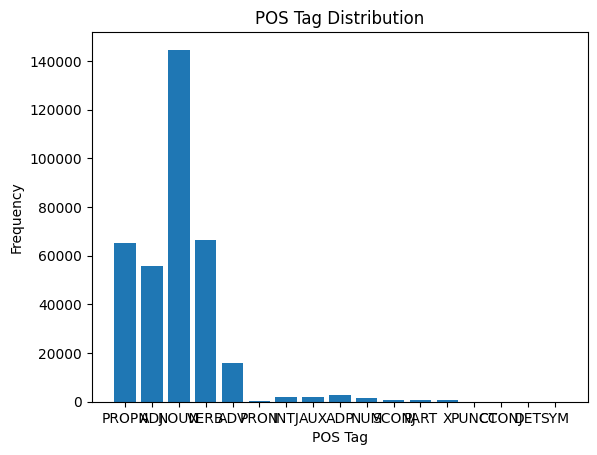

In [45]:
import matplotlib.pyplot as plt

# Bar plot of POS frequencies
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()

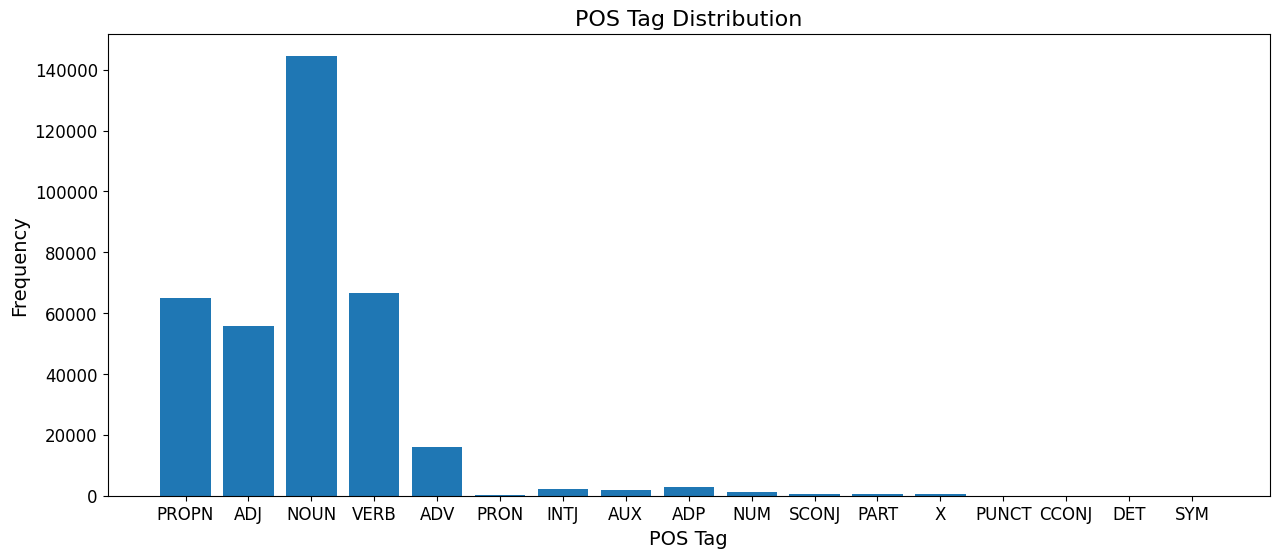

In [46]:
import matplotlib.pyplot as plt

# Adjust figure size
plt.figure(figsize=(15, 6))  # Width = 10, Height = 6 (in inches)

# Bar plot of POS frequencies
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution", fontsize=16)  # Larger title font
plt.xlabel("POS Tag", fontsize=14)  # Larger x-axis label font
plt.ylabel("Frequency", fontsize=14)  # Larger y-axis label font
plt.xticks(fontsize=12)  # Larger x-tick labels
plt.yticks(fontsize=12)  # Larger y-tick labels
plt.show()


## Task 4: Sentiment Analysis


In [47]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
# Sentiment Analysis using VADER (Valence Aware Dictionary for Sentiment Reasoning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Intialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to classify sentiment based on compound score
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [49]:
df['Vader_Sentiment'] = df['Comment_Text'].apply(vader_sentiment)

In [50]:
df.head()

,Post_Title,Comment_Text,Comment_Upvotes,Comment_Created_Date,Tokenized_Text,Stemmed_Text,Bigrams,Trigrams,Readable_Bigrams,Readable_Trigrams,POS_Tags,Entities,Vader_Sentiment
0,Israel resumes water supply to southern Gaza a...,As per CNN\n\nIsraeli Prime Minister Benjamin ...,4628.0,10/15/2023 17:52,"[CNN, israeli, Prime, Minister, Benjamin, Neta...","[cnn, isra, prime, minist, benjamin, netanyahu...","[(CNN, israeli), (israeli, Prime), (Prime, Min...","[(CNN, israeli, Prime), (israeli, Prime, Minis...","[CNN israeli, israeli Prime, Prime Minister, M...","[CNN israeli Prime, israeli Prime Minister, Pr...","[(CNN, PROPN), (israeli, ADJ), (Prime, PROPN),...","[(CNN, ORG), (israeli, NORP), (Benjamin Netany...",Positive
1,Israel resumes water supply to southern Gaza a...,What’s the long game here?(3ish weeks) does Is...,703.0,10/15/2023 16:54,"[long, game, week, Israel, obliterate, norther...","[long, game, week, israel, obliter, northern, ...","[(long, game), (game, week), (week, Israel), (...","[(long, game, week), (game, week, Israel), (we...","[long game, game week, week Israel, Israel obl...","[long game week, game week Israel, week Israel...","[(long, ADJ), (game, NOUN), (week, NOUN), (Isr...","[(Israel, GPE), (Gaza, GPE), (Hamas, ORG), (ha...",Negative
2,Israel resumes water supply to southern Gaza a...,Good job to U.S. diplomats for changing Isreal...,5684.0,10/15/2023 16:24,"[good, job, diplomat, change, Isreal, mind]","[good, job, diplomat, chang, isreal, mind]","[(good, job), (job, diplomat), (diplomat, chan...","[(good, job, diplomat), (job, diplomat, change...","[good job, job diplomat, diplomat change, chan...","[good job diplomat, job diplomat change, diplo...","[(good, ADJ), (job, NOUN), (diplomat, NOUN), (...",[],Positive
3,Israel resumes water supply to southern Gaza a...,The US is in a crucial position to advance the...,1805.0,10/15/2023 16:44,"[crucial, position, advance, humanitarian, cor...","[crucial, posit, advanc, humanitarian, corrido...","[(crucial, position), (position, advance), (ad...","[(crucial, position, advance), (position, adva...","[crucial position, position advance, advance h...","[crucial position advance, position advance hu...","[(crucial, ADJ), (position, NOUN), (advance, N...","[(Palestinians, NORP)]",Positive
4,Israel resumes water supply to southern Gaza a...,Everybody hates the United States until it’s t...,230.0,10/15/2023 20:14,"[everybody, hate, United, States, time, United...","[everybodi, hate, unit, state, time, unit, sta...","[(everybody, hate), (hate, United), (United, S...","[(everybody, hate, United), (hate, United, Sta...","[everybody hate, hate United, United States, S...","[everybody hate United, hate United States, Un...","[(everybody, PRON), (hate, VERB), (United, PRO...","[(United States, GPE), (United States, GPE)]",Positive


In [51]:
from textblob import TextBlob

# Function to classify sentiment based on polarity
def textblob_sentiment(text):
  polarity = TextBlob(text).sentiment.polarity
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

In [52]:
df['TextBlob_sentiment'] = df['Comment_Text'].apply(textblob_sentiment)

In [53]:
df.head()

,Post_Title,Comment_Text,Comment_Upvotes,Comment_Created_Date,Tokenized_Text,Stemmed_Text,Bigrams,Trigrams,Readable_Bigrams,Readable_Trigrams,POS_Tags,Entities,Vader_Sentiment,TextBlob_sentiment
0,Israel resumes water supply to southern Gaza a...,As per CNN\n\nIsraeli Prime Minister Benjamin ...,4628.0,10/15/2023 17:52,"[CNN, israeli, Prime, Minister, Benjamin, Neta...","[cnn, isra, prime, minist, benjamin, netanyahu...","[(CNN, israeli), (israeli, Prime), (Prime, Min...","[(CNN, israeli, Prime), (israeli, Prime, Minis...","[CNN israeli, israeli Prime, Prime Minister, M...","[CNN israeli Prime, israeli Prime Minister, Pr...","[(CNN, PROPN), (israeli, ADJ), (Prime, PROPN),...","[(CNN, ORG), (israeli, NORP), (Benjamin Netany...",Positive,Positive
1,Israel resumes water supply to southern Gaza a...,What’s the long game here?(3ish weeks) does Is...,703.0,10/15/2023 16:54,"[long, game, week, Israel, obliterate, norther...","[long, game, week, israel, obliter, northern, ...","[(long, game), (game, week), (week, Israel), (...","[(long, game, week), (game, week, Israel), (we...","[long game, game week, week Israel, Israel obl...","[long game week, game week Israel, week Israel...","[(long, ADJ), (game, NOUN), (week, NOUN), (Isr...","[(Israel, GPE), (Gaza, GPE), (Hamas, ORG), (ha...",Negative,Negative
2,Israel resumes water supply to southern Gaza a...,Good job to U.S. diplomats for changing Isreal...,5684.0,10/15/2023 16:24,"[good, job, diplomat, change, Isreal, mind]","[good, job, diplomat, chang, isreal, mind]","[(good, job), (job, diplomat), (diplomat, chan...","[(good, job, diplomat), (job, diplomat, change...","[good job, job diplomat, diplomat change, chan...","[good job diplomat, job diplomat change, diplo...","[(good, ADJ), (job, NOUN), (diplomat, NOUN), (...",[],Positive,Positive
3,Israel resumes water supply to southern Gaza a...,The US is in a crucial position to advance the...,1805.0,10/15/2023 16:44,"[crucial, position, advance, humanitarian, cor...","[crucial, posit, advanc, humanitarian, corrido...","[(crucial, position), (position, advance), (ad...","[(crucial, position, advance), (position, adva...","[crucial position, position advance, advance h...","[crucial position advance, position advance hu...","[(crucial, ADJ), (position, NOUN), (advance, N...","[(Palestinians, NORP)]",Positive,Positive
4,Israel resumes water supply to southern Gaza a...,Everybody hates the United States until it’s t...,230.0,10/15/2023 20:14,"[everybody, hate, United, States, time, United...","[everybodi, hate, unit, state, time, unit, sta...","[(everybody, hate), (hate, United), (United, S...","[(everybody, hate, United), (hate, United, Sta...","[everybody hate, hate United, United States, S...","[everybody hate United, hate United States, Un...","[(everybody, PRON), (hate, VERB), (United, PRO...","[(United States, GPE), (United States, GPE)]",Positive,Neutral


In [54]:
from transformers import pipeline

bert_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


# initialize a sentiment analysis piepline use Pre-Trained BERT model

# Function to extract sentiment using BERT
def bert_sentiment(text):
    result = bert_analyzer(text[:512])[0]  # Truncate text to max 512 tokens
    return result['label']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [55]:
df['BERT_Sentiments'] = df['Comment_Text'].apply(bert_sentiment)

In [56]:
df[['Comment_Text','Vader_Sentiment','TextBlob_sentiment','BERT_Sentiments']].head()

,Comment_Text,Vader_Sentiment,TextBlob_sentiment,BERT_Sentiments
0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,Positive,Positive,NEGATIVE
1,What’s the long game here?(3ish weeks) does Is...,Negative,Negative,NEGATIVE
2,Good job to U.S. diplomats for changing Isreal...,Positive,Positive,POSITIVE
3,The US is in a crucial position to advance the...,Positive,Positive,POSITIVE
4,Everybody hates the United States until it’s t...,Positive,Neutral,NEGATIVE


<ipython-input-57-25d63cefc7ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


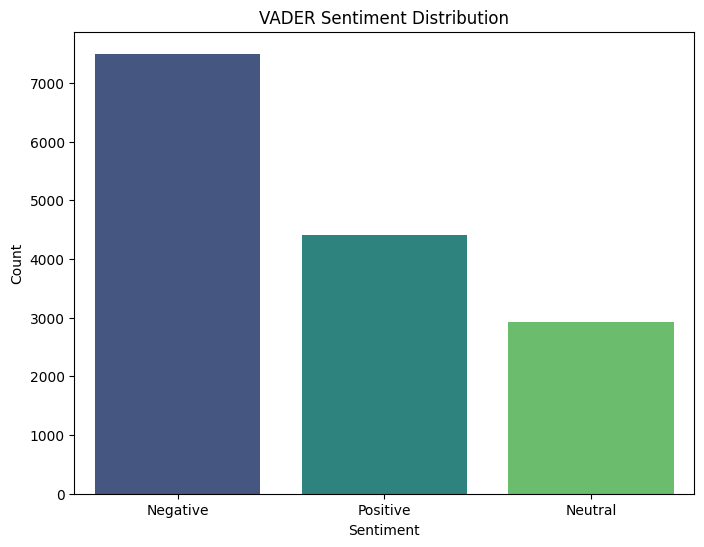

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['Vader_Sentiment'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-58-056e6d4c72e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


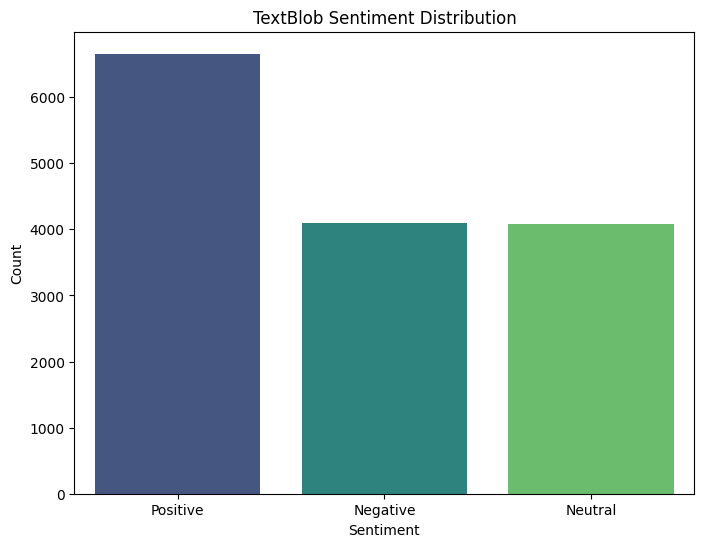

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['TextBlob_sentiment'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("TextBlob Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-59-5a99ddc0b1f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


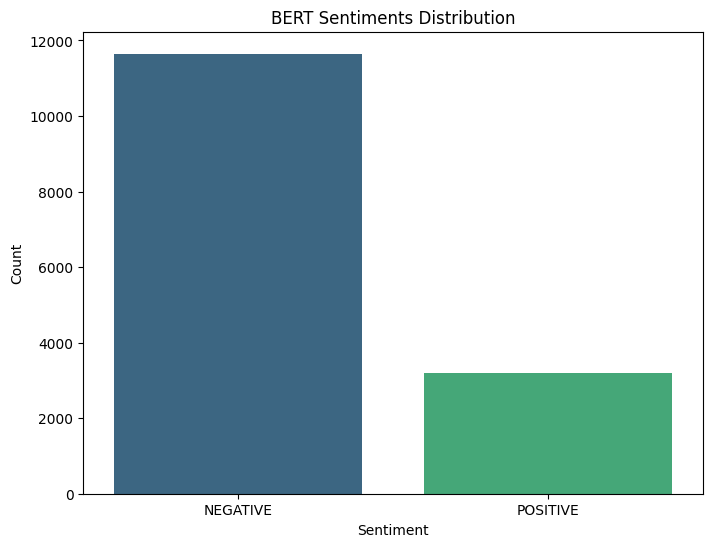

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['BERT_Sentiments'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("BERT Sentiments Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [60]:
df['Comment_Created_Date'] = pd.to_datetime(df['Comment_Created_Date'])

In [61]:
# Group by date and calculate sentiment counts
sentiment_trends = df.groupby([df['Comment_Created_Date'].dt.date, 'Vader_Sentiment']).size().unstack(fill_value=0)
# Calculate propotion6 for each sen6timent
sentiment_trends = sentiment_trends.div(sentiment_trends.sum(axis=1), axis=0)

# Reset index for visualization
sentiment_trends.reset_index(inplace=True)

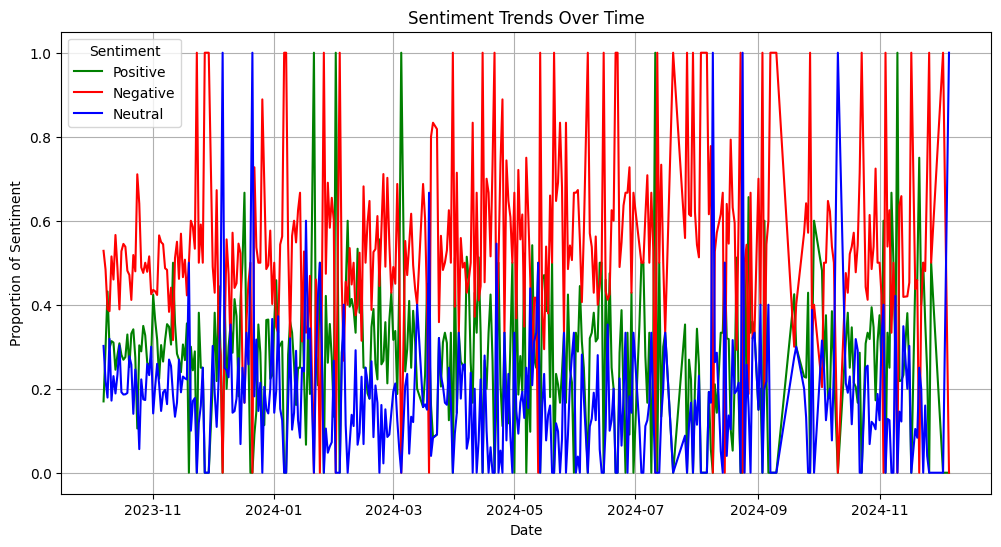

In [62]:
import matplotlib.pyplot as plt

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Neutral'], label='Neutral', color='blue')

plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

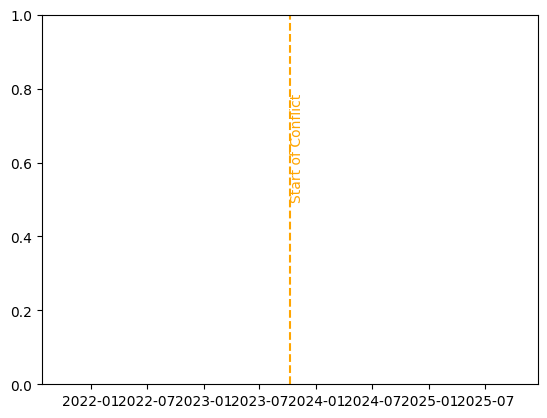

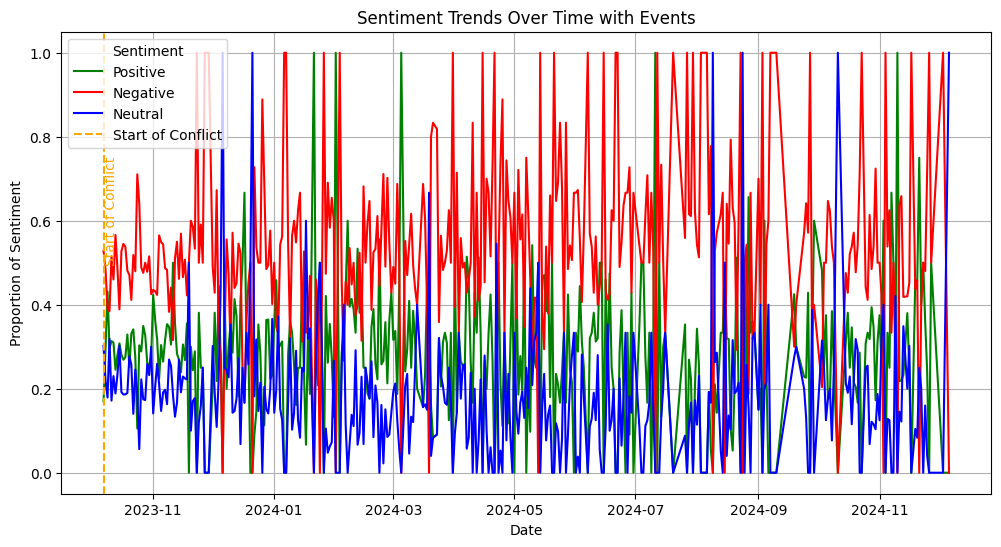

In [63]:
# Add vertical lines for real-world events
plt.axvline(pd.to_datetime('2023-10-07'), color='orange', linestyle='--', label='Start of Conflict')
plt.text(pd.to_datetime('2023-10-07'), 0.5, 'Start of Conflict', rotation=90, color='orange')

# Re-plot the trends with annotations
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Neutral'], label='Neutral', color='blue')

plt.axvline(pd.to_datetime('2023-10-07'), color='orange', linestyle='--', label='Start of Conflict')
plt.text(pd.to_datetime('2023-10-07'), 0.5, 'Start of Conflict', rotation=90, color='orange')

plt.title("Sentiment Trends Over Time with Events")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

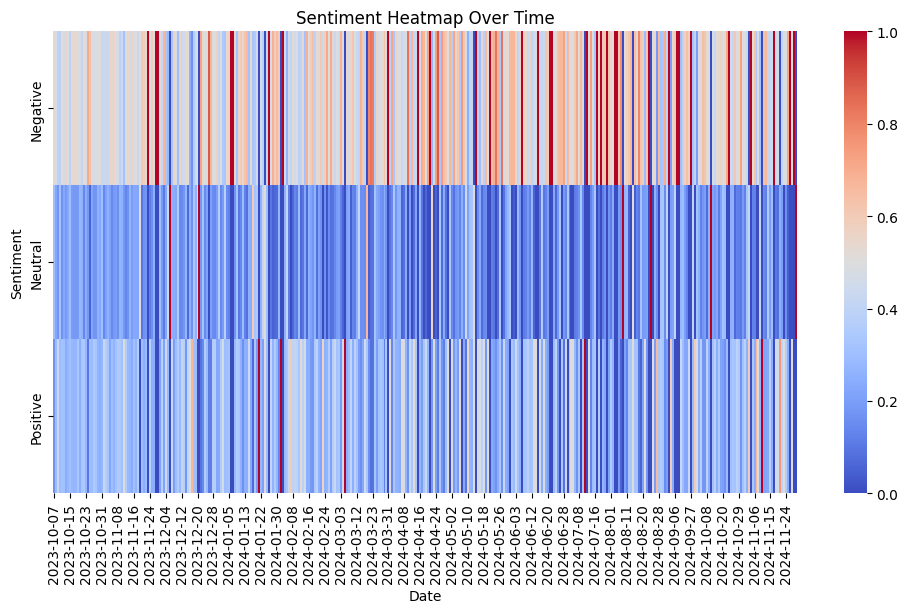

In [64]:
import seaborn as sns

# Create a heatmap for sentiment proportions
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_trends.set_index('Comment_Created_Date').T, cmap='coolwarm', annot=False, cbar=True)

plt.title("Sentiment Heatmap Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.show()

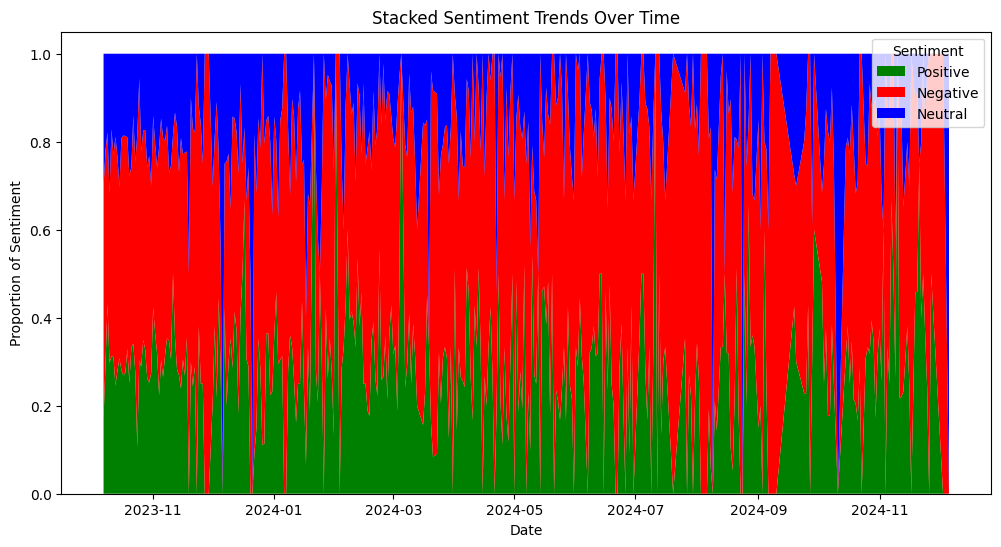

In [65]:
# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    sentiment_trends['Comment_Created_Date'],
    sentiment_trends['Positive'],
    sentiment_trends['Negative'],
    sentiment_trends['Neutral'],
    labels=['Positive', 'Negative', 'Neutral'],
    colors=['green', 'red', 'blue']
)

plt.title("Stacked Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.show()

## Task 5: Topic Modeling

In [66]:
# pip install gensim nltk

In [67]:
# Preprocess Data for LDA
# Remove stopwords, lemmatize, and clean the text. Use Gensim’s Dictionary and Corpus to prepare the data for LDA.
import gensim
from gensim import corpora
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [68]:
def clean_tokens(tokens):
    return [word for word in tokens if word not in stop_words and len(word) > 2]

In [69]:
# Apply corrected token cleaning
df['Cleaned_Tokens'] = df['Tokenized_Text'].apply(clean_tokens)

In [70]:
# Display rows with non-empty token lists
print(df[df['Cleaned_Tokens'].apply(lambda x: len(x) > 0)][['Comment_Text', 'Cleaned_Tokens']].head())

# Check rows with empty Cleaned_Tokens
print(df[df['Cleaned_Tokens'].apply(lambda x: len(x) == 0)][['Comment_Text', 'Cleaned_Tokens']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Cleaned_Tokens  
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...  
1  [long, game, week, Israel, obliterate, norther...  
2        [good, job, diplomat, change, Isreal, mind]  
3  [crucial, position, advance, humanitarian, cor...  
4  [everybody, hate, United, States, time, United...  
          Comment_Text Cleaned_Tokens
137  Well, here we go.             []
139    UN: How the fu-             []
297            You in?             []
581         Well done!             []
818             💪🏼🇮🇱✊🏼             []


In [71]:
from gensim import corpora

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['Cleaned_Tokens'])
corpus = [dictionary.doc2bow(text) for text in df['Cleaned_Tokens']]

# Check the dictionary and corpus
print(f"Number of unique tokens in dictionary: {len(dictionary)}")
print(f"Number of documents in corpus: {len(corpus)}")
print("Sample Corpus (First 3 Rows):")
print(corpus[:3])

Number of unique tokens in dictionary: 18622
Number of documents in corpus: 14835
Sample Corpus (First 3 Rows):
[[(0, 2), (1, 1), (2, 3), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 3), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 2), (44, 1), (45, 5)], [(4, 2), (5, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)]]


count    14835.000000
mean        23.736164
std         38.701024
min          0.000000
25%          5.000000
50%         11.000000
75%         26.000000
max        695.000000
Name: Token_Count, dtype: float64


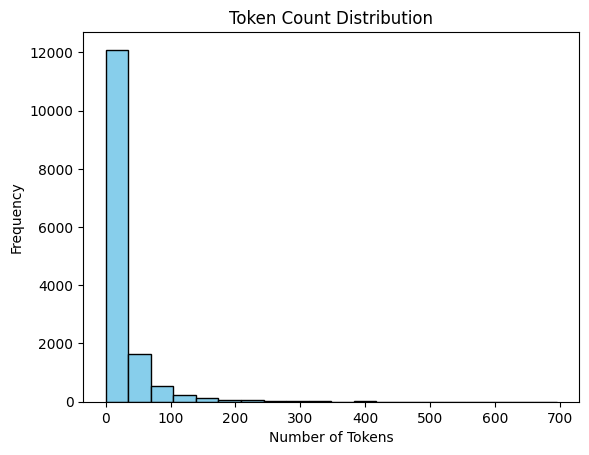

In [72]:
# Calculate token counts per document
df['Token_Count'] = df['Cleaned_Tokens'].apply(len)

# Display summary statistics
print(df['Token_Count'].describe())

# Plot token count distribution
import matplotlib.pyplot as plt

plt.hist(df['Token_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title("Token Count Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [73]:
from gensim.models import LdaModel

# Define number of topics
num_topics = 5

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics with keywords
print("Topics and their keywords:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")

Topics and their keywords:
Topic 1: 0.025*"civilian" + 0.019*"kill" + 0.016*"Gaza" + 0.014*"Hamas" + 0.012*"child" + 0.011*"genocide" + 0.011*"IDF" + 0.011*"bomb" + 0.010*"death" + 0.009*"israeli"
Topic 2: 0.032*"people" + 0.014*"like" + 0.012*"think" + 0.011*"Israel" + 0.011*"Jews" + 0.010*"right" + 0.009*"pro" + 0.009*"support" + 0.008*"thing" + 0.007*"want"
Topic 3: 0.018*"delete" + 0.014*"news" + 0.012*"settlement" + 0.009*"source" + 0.009*"medium" + 0.007*"say" + 0.007*"report" + 0.006*"lie" + 0.006*"read" + 0.006*"article"
Topic 4: 0.014*"arab" + 0.013*"land" + 0.013*"Jews" + 0.013*"jewish" + 0.011*"palestinian" + 0.011*"state" + 0.009*"Arabs" + 0.008*"Palestinians" + 0.008*"Jew" + 0.008*"group"
Topic 5: 0.049*"Israel" + 0.033*"Hamas" + 0.015*"Palestinians" + 0.014*"war" + 0.012*"Gaza" + 0.011*"want" + 0.009*"state" + 0.007*"israeli" + 0.007*"people" + 0.007*"palestinian"


In [74]:
# Define number of topics
num_topics = 10

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics with keywords
print("Topics and their keywords:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")

Topics and their keywords:
Topic 1: 0.044*"Israel" + 0.021*"Hamas" + 0.016*"war" + 0.014*"Gaza" + 0.009*"israeli" + 0.008*"military" + 0.008*"attack" + 0.007*"rocket" + 0.007*"international" + 0.006*"destroy"
Topic 2: 0.032*"Israel" + 0.031*"Gaza" + 0.013*"West" + 0.012*"palestinian" + 0.012*"Palestinians" + 0.010*"country" + 0.010*"refugee" + 0.010*"Bank" + 0.010*"israeli" + 0.010*"Lebanon"
Topic 3: 0.052*"civilian" + 0.050*"Hamas" + 0.034*"kill" + 0.024*"IDF" + 0.024*"death" + 0.022*"number" + 0.018*"hospital" + 0.016*"child" + 0.016*"say" + 0.016*"report"
Topic 4: 0.027*"people" + 0.023*"Israel" + 0.023*"like" + 0.019*"genocide" + 0.017*"think" + 0.017*"war" + 0.014*"know" + 0.012*"time" + 0.009*"happen" + 0.008*"look"
Topic 5: 0.037*"people" + 0.019*"Hamas" + 0.012*"like" + 0.011*"kill" + 0.011*"think" + 0.011*"Israel" + 0.011*"israeli" + 0.010*"know" + 0.010*"Palestinians" + 0.010*"innocent"
Topic 6: 0.023*"rape" + 0.016*"video" + 0.012*"woman" + 0.011*"nuance" + 0.011*"feeling" +

In [75]:
# Function to get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for row in lda_model[corpus]:
        row = sorted(row, key=lambda x: x[1], reverse=True)
        dominant_topics.append(row[0][0])  # Get the topic with the highest weight
    return dominant_topics

# Assign dominant topics to the dataset
df['Dominant_Topic'] = get_dominant_topic(lda_model, corpus)

# View the updated DataFrame
print(df[['Comment_Text', 'Dominant_Topic']].head())

                                        Comment_Text  Dominant_Topic
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...               1
1  What’s the long game here?(3ish weeks) does Is...               1
2  Good job to U.S. diplomats for changing Isreal...               0
3  The US is in a crucial position to advance the...               1
4  Everybody hates the United States until it’s t...               1


In [78]:
# pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.3 MB/s eta 0:00:00


In [79]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the LDA visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)

## Task 6: Stylometric Analysis and Visualization

In [80]:
# Feature Extraction Using Text Statistics
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the Comment_Text or Preprocessed Text
text_data = df['Cleaned_Tokens'].apply(lambda tokens: " ".join(tokens))  # Join tokens back to text

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Use unigrams and bigrams
X = vectorizer.fit_transform(text_data)

print("Shape of TF-IDF matrix:", X.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of TF-IDF matrix: (14835, 1000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


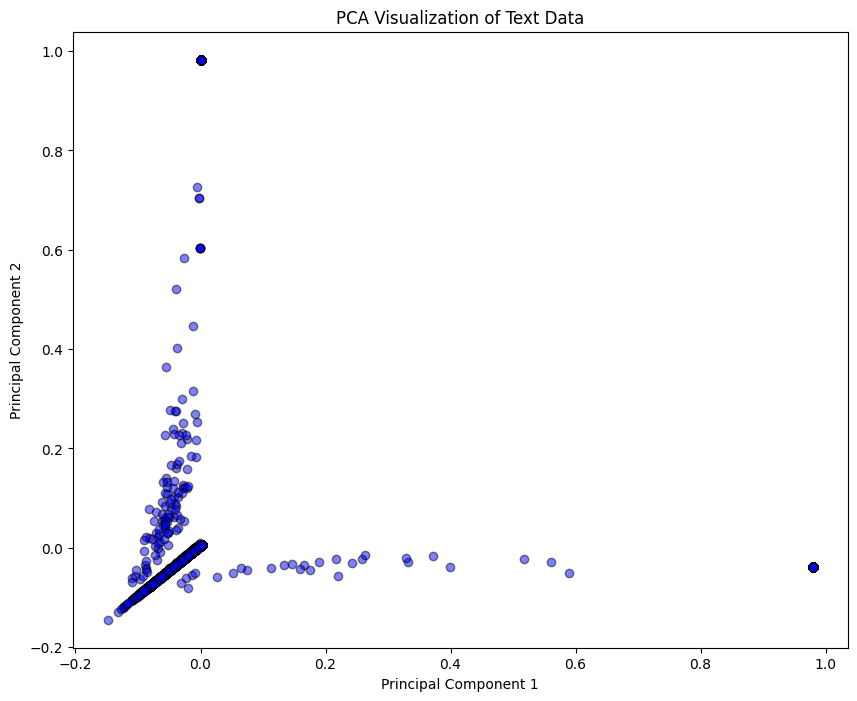

In [81]:
# Dimensionality Reduction Using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.5,c='blue',edgecolor='k')
plt.title('PCA Visualization of Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


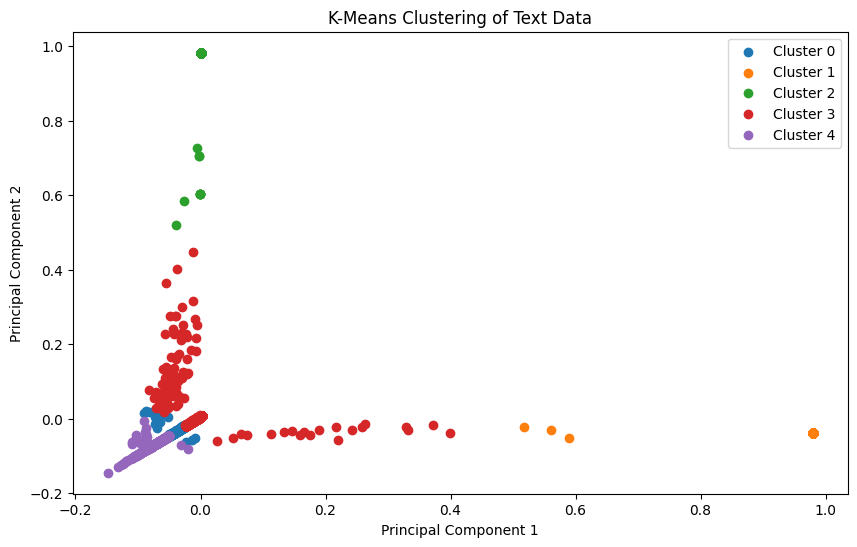

In [82]:
# Clustering with K-Means
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters,random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters

#Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.title("K-Means Clustering of Text Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


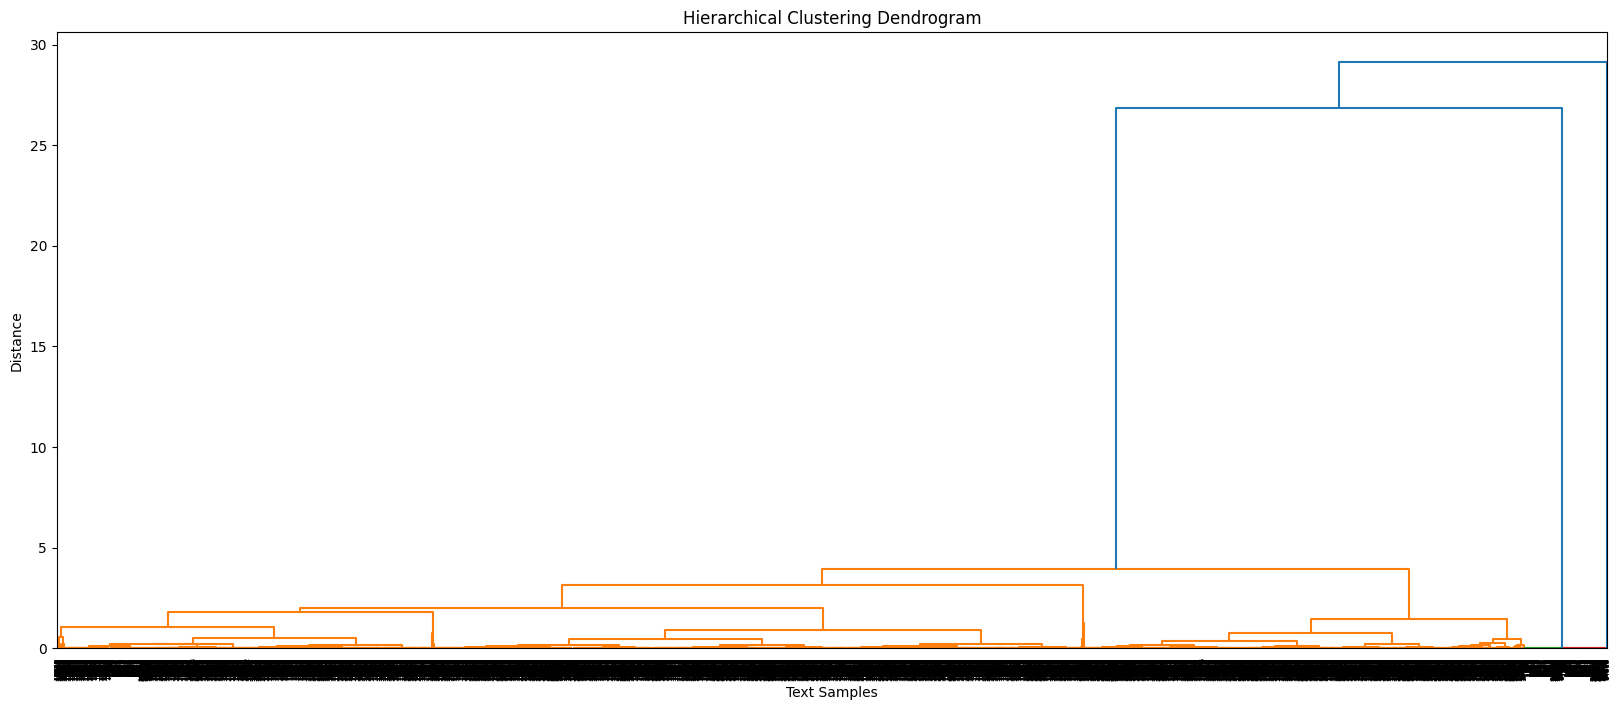

In [83]:
# Visualize Text Patterns Using Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# Use PCA-reduced data for hierarchical clustering
linkage_matrix = linkage(X_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


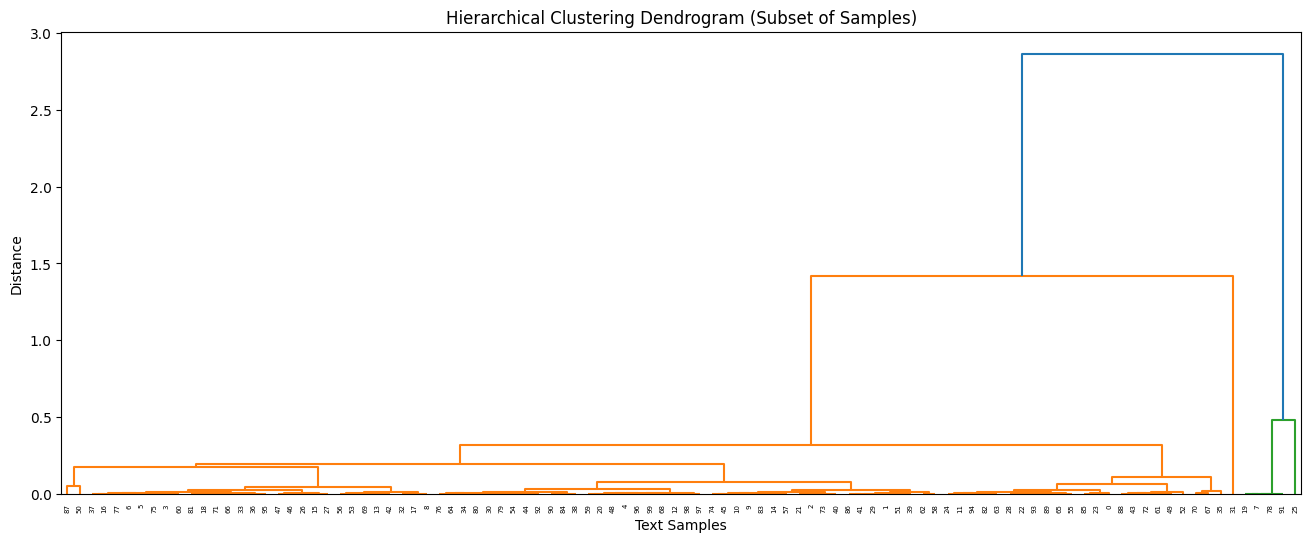

In [84]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample a subset of data (e.g., 100 random samples)
subset_indices = np.random.choice(range(len(X_pca)), size=100, replace=False)
X_pca_subset = X_pca[subset_indices]

# Perform hierarchical clustering
linkage_matrix_subset = linkage(X_pca_subset, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix_subset, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Subset of Samples)")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


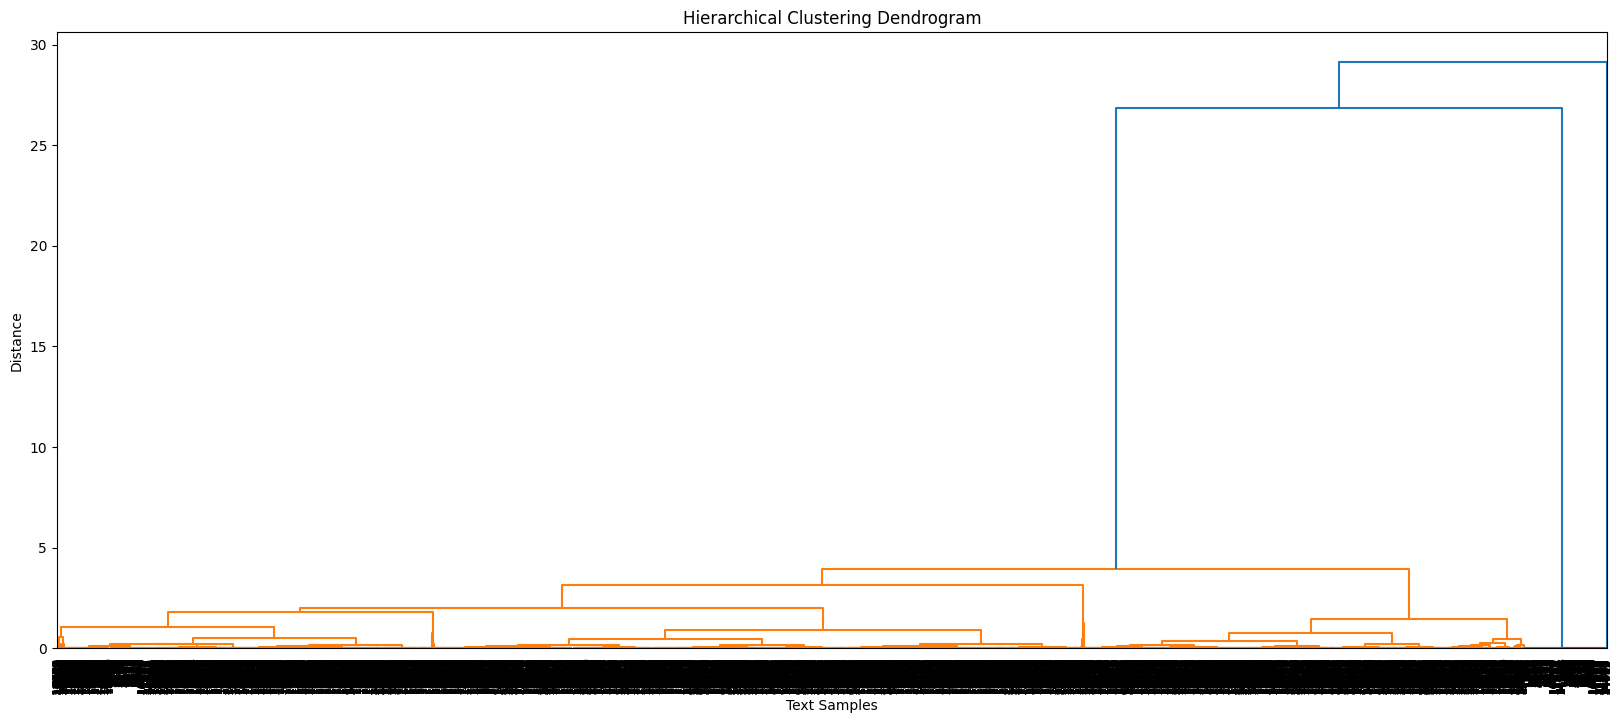

In [85]:
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True,
           leaf_rotation=90,   # Rotate x-axis labels
           leaf_font_size=8)   # Adjust font size

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


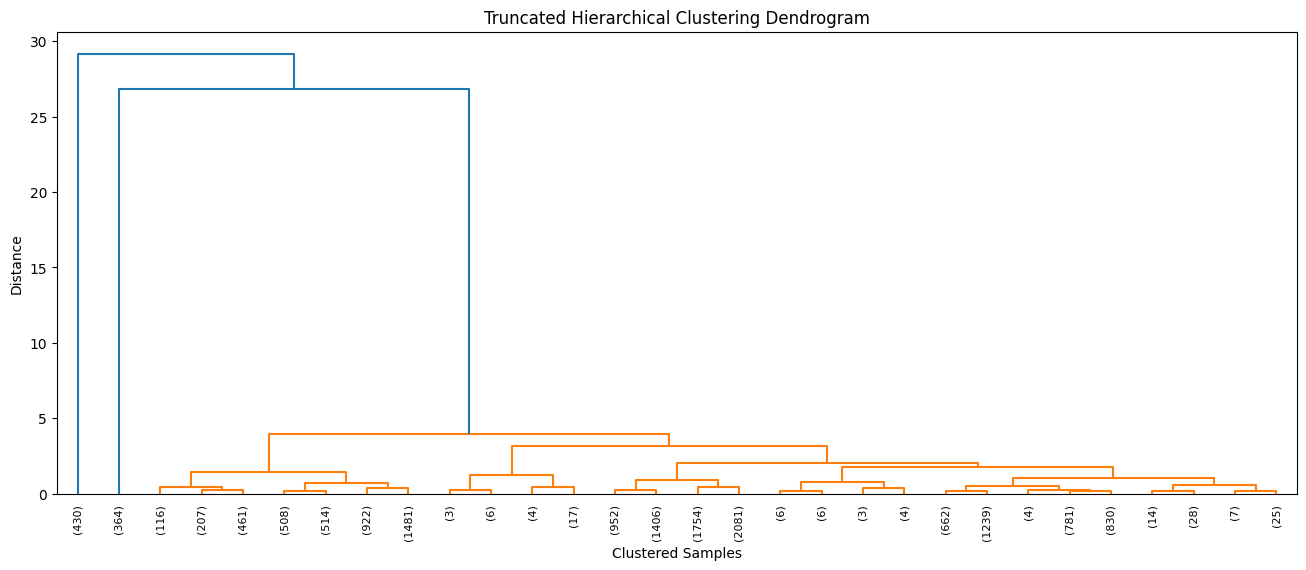

In [86]:
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # Show only the last p clusters
           p=30,                   # Number of clusters to show
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8)

plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Clustered Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


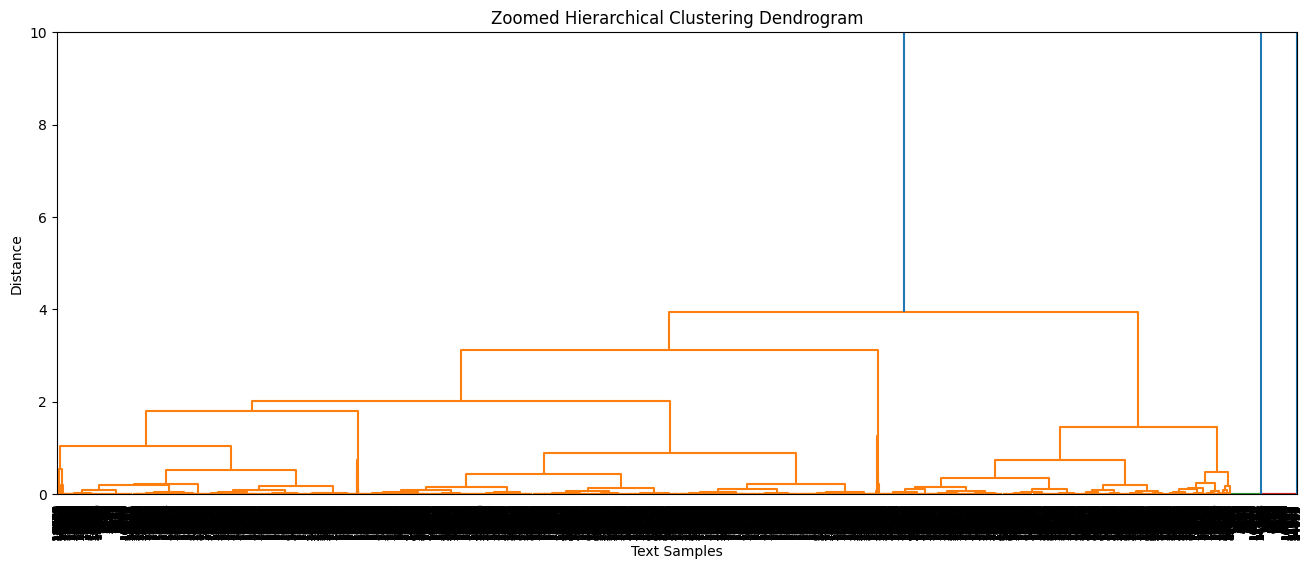

In [87]:
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8)

plt.ylim(0, 10)  # Adjust the y-axis to zoom in (set your desired threshold)
plt.title("Zoomed Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


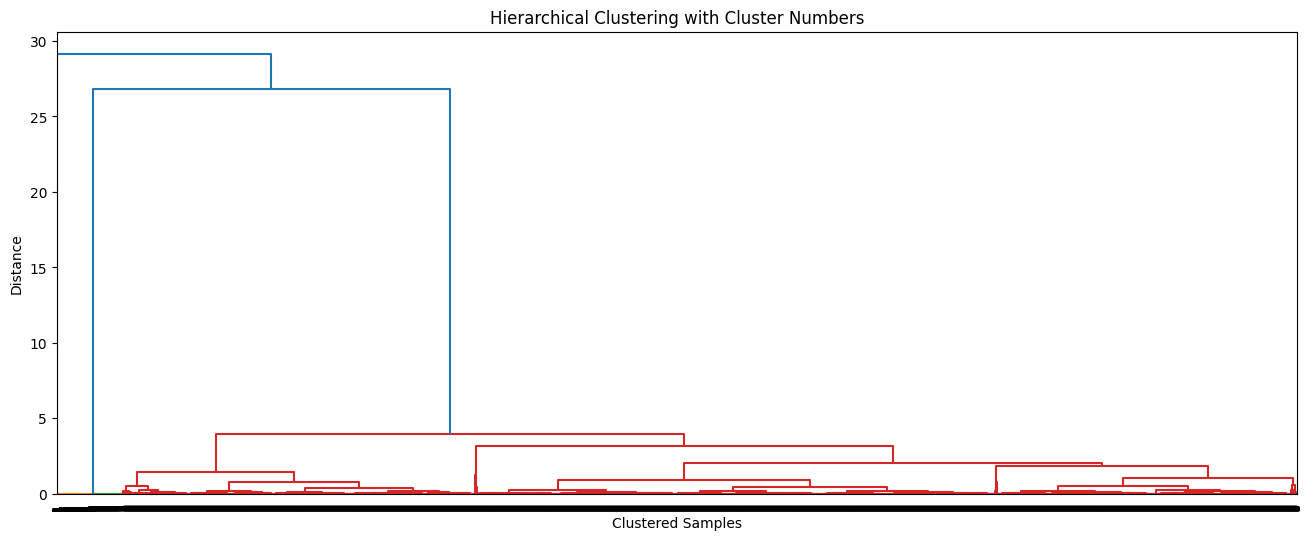

In [88]:
from scipy.cluster.hierarchy import fcluster

# Perform clustering and retrieve cluster assignments
max_d = 10  # Distance threshold for clusters
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# Replace x-axis labels with cluster IDs
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix,
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8,
           labels=clusters)  # Use cluster numbers as labels

plt.title("Hierarchical Clustering with Cluster Numbers")
plt.xlabel("Clustered Samples")
plt.ylabel("Distance")
plt.show()

## Task 7: Document Clustering with Word2Vec or Doc2Vec

In [89]:
# pip install gensim sklearn matplotlib nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [90]:
# Use the cleaned tokenized text for clustering
text_data = df['Cleaned_Tokens'].apply(lambda tokens: " ".join(tokens))  # Convert token lists to sentences
print(text_data.head())

0    CNN israeli Prime Minister Benjamin Netanyahu ...
1    long game week Israel obliterate northern Gaza...
2                 good job diplomat change Isreal mind
3    crucial position advance humanitarian corridor...
4    everybody hate United States time United State...
Name: Cleaned_Tokens, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tag each document with a unique ID
tagged_data = [TaggedDocument(words=text.split(), tags=[str(index)]) for index, text in enumerate(text_data)]

print(tagged_data[:3])  # Show a few tagged documents

[TaggedDocument(words=['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 'Water', 'Authority', 'say', 'sure', 'true', 'electricity', 'restore', 'confirm', 'moment', 'water', 'station', 'Khan', 'Younis', 'Gaza', 'City', 'central', 'Gaza', 'condition', 'receive', 'distribute', 'water', 'people', 'Munther', 'Shublaq', 'director', 'Water', 'Authority', 'Gaza', 'tell', 'CNN', 'enable', 'station', 'receive', 'distribute', 'water', 'need', 'electricity', 'currently', 'cut', 'alternative', 'fuel', 'power', 'generator', 'pressure', 'restore', 'water', 'supply', 'confirm', 'station', 'ready'], tags=['0']), TaggedDocument(words=['long', 'game', 'week', 'Israel', 'obliterate', 'northern', 'Gaza', 'Hamas', 'slowly', 'invite', 'vet', 'non', 'hamas', 'Palestinians', 'northern', 'Gaza', 'obliterate', 'south'], tags=['1']), TaggedDocument(words=['good', 'job', 'diplomat', 'chang

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train the Doc2Vec Model

In [92]:
from gensim.models.doc2vec import Doc2Vec

# Train the Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=2, workers=4, epochs=20)

# Save the model
model.save("doc2vec_model")

# Generate document vectors
doc_vectors = [model.dv[str(i)] for i in range(len(tagged_data))]
print("Number of document vectors:", len(doc_vectors))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of document vectors: 14835


Apply K-Means Clustering

In [93]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(doc_vectors)

print("Cluster Assignments:")
print(df['Cluster'].value_counts())

df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster Assignments:
Cluster
2    10453
0     2570
1     1394
3      237
4      181
Name: count, dtype: int64


Visualize Clusters Using t-SNE

In [96]:
# pip install sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


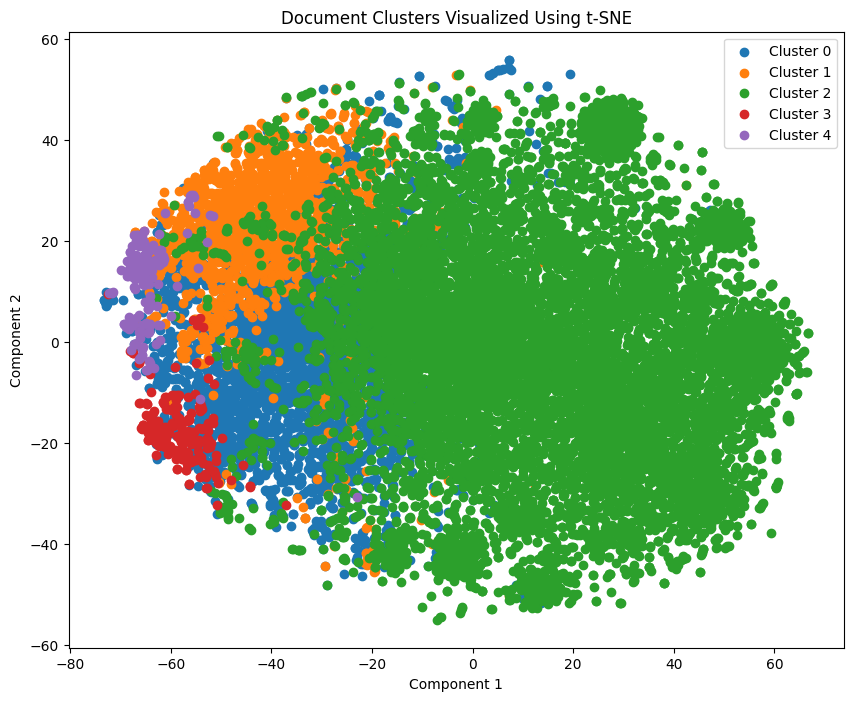

In [99]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ensure doc_vectors is a NumPy array
doc_vectors = np.array(doc_vectors)

# reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(doc_vectors)

# Plot the Clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(X_tsne[df['Cluster'] == cluster, 0], X_tsne[df['Cluster'] == cluster, 1], label=f"Cluster {cluster}")

plt.title("Document Clusters Visualized Using t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

In [100]:
for cluster in range(num_clusters):
    print(f"\nDocuments in Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Comment_Text'].head(5))  # Show sample comments for each cluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Documents in Cluster 0:
21    “Provide water to your mortal enemies for free...
23    Israel only supplies 10% of water to the gaza ...
30    Oof. Israel controls the water supply? This si...
42    According to an official IDF spokesperson, onl...
45    Why does noone mention that only a fraction of...
Name: Comment_Text, dtype: object

Documents in Cluster 1:
121    This is a good reminder that, for many people,...
191    Really difficult to understamd why people demo...
361    That's true. Democratic governments by their v...
460    I love seeing the commments here that understa...
462    How much of the anti-Israel crap is based on p...
Name: Comment_Text, dtype: object

Documents in Cluster 2:
1    What’s the long game here?(3ish weeks) does Is...
2    Good job to U.S. diplomats for changing Isreal...
3    The US is in a crucial position to advance the...
4    Everybody hates the United States until it’s t...
5    Oh thank fuck\n\nEdit: I feel bad for having s...
Name: Comment_Tex

## Task 8: Dependency Parsing and Advanced Structures

Load the Data and Initialize SpaCy

In [115]:
# Load SpaCy's small English model
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
# Take a subset of sentences for parsing (e.g., first 5 comments)
subset_sentences = df['Comment_Text'].dropna().head(5)
print("Sample Sentences for Parsing:")
print(subset_sentences)

Sample Sentences for Parsing:
0    As per CNN\n\nIsraeli Prime Minister Benjamin ...
1    What’s the long game here?(3ish weeks) does Is...
2    Good job to U.S. diplomats for changing Isreal...
3    The US is in a crucial position to advance the...
4    Everybody hates the United States until it’s t...
Name: Comment_Text, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perform Dependency Parsing

In [117]:
def dependency_parse(text):
    doc = nlp(text)  # Parse the text
    parsed_output = []
    for token in doc:
        parsed_output.append({
            "Word": token.text,
            "POS": token.pos_,
            "Dependency": token.dep_,
            "Head": token.head.text,
            "Children": [child.text for child in token.children]
        })
    return parsed_output

# Apply dependency parsing on the subset
parsed_sentences = subset_sentences.apply(dependency_parse)

# Display parsed results
for idx, sentence in enumerate(parsed_sentences):
    print(f"\nSentence {idx + 1} Parsed Results:")
    for word_data in sentence:
        print(f"Word: {word_data['Word']}, POS: {word_data['POS']}, "
              f"Dependency: {word_data['Dependency']}, Head: {word_data['Head']}, "
              f"Children: {word_data['Children']}")



Sentence 1 Parsed Results:
Word: As, POS: ADP, Dependency: prep, Head: told, Children: ['per']
Word: per, POS: ADP, Dependency: prep, Head: As, Children: ['CNN']
Word: CNN, POS: PROPN, Dependency: pobj, Head: per, Children: ['\n\n']
Word: 

, POS: SPACE, Dependency: dep, Head: CNN, Children: []
Word: Israeli, POS: ADJ, Dependency: amod, Head: Minister, Children: []
Word: Prime, POS: PROPN, Dependency: compound, Head: Minister, Children: []
Word: Minister, POS: PROPN, Dependency: compound, Head: Netanyahu, Children: ['Israeli', 'Prime']
Word: Benjamin, POS: PROPN, Dependency: compound, Head: Netanyahu, Children: []
Word: Netanyahu, POS: PROPN, Dependency: poss, Head: office, Children: ['Minister', 'Benjamin', '’s']
Word: ’s, POS: PART, Dependency: case, Head: Netanyahu, Children: []
Word: office, POS: NOUN, Dependency: nsubj, Head: told, Children: ['Netanyahu']
Word: told, POS: VERB, Dependency: ROOT, Head: told, Children: ['As', 'office', 'CNN', 'restored', ',', 'but', 'said']
Word: C

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualize Dependency Parse Tree

In [118]:
from spacy import displacy

# Visualize the dependency parse for the first sentence
for idx, text in enumerate(subset_sentences):
    print(f"\nVisualizing Sentence {idx + 1}: {text}")
    doc = nlp(text)
    displacy.render(doc, style="dep", jupyter=True, options={"compact": True, "color": "blue", "bg": "#f5f5f5"})


Visualizing Sentence 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Visualizing Sentence 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can obliterate the south?



Visualizing Sentence 3: Good job to U.S. diplomats for changing Isreal's mind.



Visualizing Sentence 4: The US is in a crucial position to advance the humanitarian corridor to innocent Palestinians. You accept our taxpayer dollars then your government needs to comply with reasonable requests that do no endanger civilians at home or elsewhere.



Visualizing Sentence 5: Everybody hates the United States until it’s time to do United States stuff


Export Visualizations

In [119]:
from spacy import displacy

# Save the dependency tree visualization to an HTML file
for idx, text in enumerate(subset_sentences):
    doc = nlp(text)
    output_path = f"sentence_{idx + 1}_dependency_tree.html"
    with open(output_path, "w", encoding="utf-8") as f:
        html = displacy.render(doc, style="dep", page=True, jupyter=False)  # Set jupyter=False
        f.write(html)  # Write the returned HTML string
    print(f"Saved visualization for Sentence {idx + 1} as {output_path}")


Saved visualization for Sentence 1 as sentence_1_dependency_tree.html
Saved visualization for Sentence 2 as sentence_2_dependency_tree.html
Saved visualization for Sentence 3 as sentence_3_dependency_tree.html
Saved visualization for Sentence 4 as sentence_4_dependency_tree.html
Saved visualization for Sentence 5 as sentence_5_dependency_tree.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extract Syntactic Structures (Subjects, Verbs, Objects)

In [120]:
import pandas as pd

# Ensure subset_sentences is a pandas Series
subset_sentences = pd.Series(subset_sentences)

# Apply SVO extraction on the subset
svo_results = subset_sentences.apply(extract_svo)

# Display SVO results
print("\nExtracted Subjects, Verbs, and Objects:")
for idx, result in enumerate(svo_results):
    print(f"Sentence {idx + 1}:")
    print(f"Subjects: {result['Subjects']}")
    print(f"Verbs: {result['Verbs']}")
    print(f"Objects: {result['Objects']}\n")


Extracted Subjects, Verbs, and Objects:
Sentence 1:
Subjects: ['office', 'Israel', 'director', 'he', 'it', 'I', 'stations', 'Shublaq', 'we', 'alternative', 'we', 'I', 'stations']
Verbs: ['told', 'restored', 'said', 'restored', 'confirm', 'receive', 'distribute', 'told', 'enable', 'receive', 'distribute', 'need', 'cut', 'power', 'have', 'restore', 'confirm']
Objects: ['CNN', 'CNN', 'water', 'Gaza', 'Authority', 'this', 'moment', 'Younis', 'condition', 'water', 'people', 'Authority', 'Gaza', 'CNN', 'stations', 'water', 'electricity', 'generator', 'which', 'supply', 'anything']

Sentence 2:
Subjects: ['game', 'Israel', 'they']
Verbs: ['’s', 'obliterate', 'invite', 'obliterate']
Objects: ['Hamas', 'Palestinians', 'Gaza', 'south']

Sentence 3:
Subjects: []
Verbs: ['changing']
Objects: ['diplomats', 'mind']

Sentence 4:
Subjects: ['US', 'You', 'government', 'that']
Verbs: ['advance', 'accept', 'needs', 'comply', 'do']
Objects: ['position', 'corridor', 'Palestinians', 'dollars', 'requests', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bonus Task: Implement an Advanced NLP Technique

Option 1: Text Summarization Using Hugging Face Transformers

In [121]:
# pip install transformers torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
# Select a few comments for summarization
comments = df['Comment_Text'].dropna().head(5).tolist()

# Display sample comments
for i, comment in enumerate(comments, 1):
    print(f"Comment {i}: {comment}\n")

Comment 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”

Comment 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can oblite

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Summarize each comment
print("Summarized Comments:")
for i, comment in enumerate(comments, 1):
    summary = summarizer(comment, max_length=50, min_length=20, do_sample=False)[0]['summary_text']
    print(f"Original Comment {i}: {comment}")
    print(f"Summary {i}: {summary}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Summarized Comments:


Your max_length is set to 50, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


Original Comment 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Summary 1: Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza. But the director of the Palestinian Water Authority said

Your max_length is set to 50, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Comment 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can obliterate the south?
Summary 2: What’s the long game here? Does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can obliterate the south?



Your max_length is set to 50, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Original Comment 3: Good job to U.S. diplomats for changing Isreal's mind.
Summary 3: U.S. diplomats have changed Isreal's mind. Good job to U.S.-based diplomats for changing Isreal’s mind.



Your max_length is set to 50, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Comment 4: The US is in a crucial position to advance the humanitarian corridor to innocent Palestinians. You accept our taxpayer dollars then your government needs to comply with reasonable requests that do no endanger civilians at home or elsewhere.
Summary 4: The US is in a crucial position to advance the humanitarian corridor to innocent Palestinians. You accept our taxpayer dollars then your government needs to comply with reasonable requests.

Original Comment 5: Everybody hates the United States until it’s time to do United States stuff
Summary 5: Everybody hates the U.S. until it’s time to do United States stuff.



Option 2: Sentiment Classification Using BERT

In [124]:
from transformers import pipeline

# Load the sentiment-analysis pipeline
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Analyze sentiment for sample comments
print("Sentiment Analysis with BERT:")
for i, comment in enumerate(comments, 1):
    sentiment = classifier(comment)[0]
    print(f"Comment {i}: {comment}")
    print(f"Sentiment: {sentiment['label']} (Confidence: {sentiment['score']:.2f})\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Sentiment Analysis with BERT:
Comment 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Sentiment: 1 star (Confidence: 0.31)

Comment 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/ve